In [1]:
import pandas as pd
import numpy as np
import scipy.signal
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
path = "/home/francisco/tps/datos/tp2/"
load_path = path + "dataframe_reconstruido_{}.hdf"

N = 2
pacientes = []
for paciente in range(1, 1 + N):
    pacientes.append(pd.read_hdf(load_path.format(paciente)))


In [3]:
dfs1 = [pacientes[i].loc[i+1,:,[8,44,80,131,185],:] for i in range(N)]

In [4]:
sensor_means = [df.groupby(['epoch', 'tiempo']).mean() for df in dfs1]

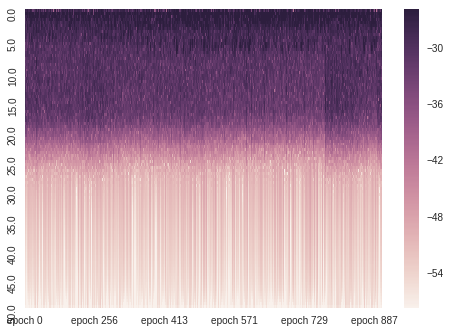

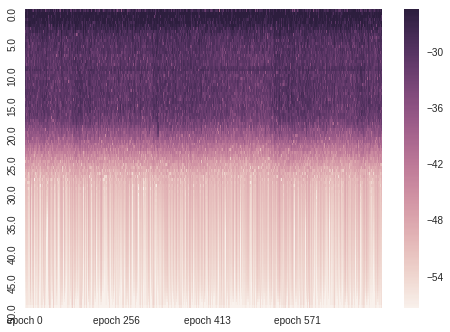

In [5]:
for sm in sensor_means:
    frecuencias = sm.groupby(['epoch']).apply(lambda x: scipy.signal.welch(x['valores'], fs=100, nperseg = 200))
    data = {'epoch {}'.format(i): np.log(f) for i,f in enumerate(map(lambda x: x[1], frecuencias.values))}
    index = frecuencias.values[0][0]
    f_df = pd.DataFrame(data=data, index=index)
    
    g = sns.heatmap(f_df, xticklabels=175, yticklabels=10, robust=True)
    sns.plt.show()
